In [1]:
from planning import utils
from shapely import geometry
from trajectory_generator.vehicle_model_node import (
    TrajectoryGenerator,
    Vehicle,
)


In [2]:
vm = TrajectoryGenerator(
                         model=Vehicle(1),
                         step=0.1,
                         r=0.2,
                         r_step=1.0,
        )


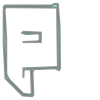

In [3]:
# no obstacle inflation
occ = utils.calculate_occupied_space('/home/basti/ros/driving_swarm_infrastructure/src/driving_swarm_bringup/maps/lndw2022.yaml', inflation=0)
occ

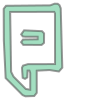

In [4]:
# with obstacle inflation
occ = utils.calculate_occupied_space('/home/basti/ros/driving_swarm_infrastructure/src/driving_swarm_bringup/maps/lndw2022.yaml')
occ

In [6]:
path = vm.tuples_to_path([(0.0, 0.0, 3.0), (1.0, 0.5, 3.1415)])
path

[(0.0, 0.0, 3.0),
 (-0.09147042720881787, 0.03776977621070235, 2.5),
 (-0.1536354837531629, 0.11476913201066062, 2.0),
 (-0.17127499570883745, 0.2121459396536297, 1.4999999999999998),
 (-0.14007019534960585, 0.30605896049371706, 1.0),
 (-0.06766110610886715, 0.37351501169816365, 0.5),
 (0.028224001611973356, 0.3979984993200891, 4.440892098500626e-16),
 (0.12534175306570963, 0.37661809950903935, 5.965997999510433),
 (0.22035339717142574, 0.3454285582439174, 5.965997999510433),
 (0.31536504127714177, 0.3142390169787955, 5.965997999510433),
 (0.4103766853828578, 0.2830494757136736, 5.965997999510433),
 (0.505388329488574, 0.25185993444855165, 5.965997999510433),
 (0.60039997359429, 0.2206703931834298, 5.965997999510433),
 (0.6954116177000064, 0.1894808519183078, 5.965997999510433),
 (0.7904232618057224, 0.1582913106531859, 5.965997999510433),
 (0.8854349059114388, 0.12710176938806392, 5.965997999510433),
 (0.9816633085042495, 0.10084065514324025, 6.19146596014092),
 (1.0793878474051344, 0

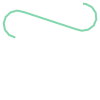

In [7]:
utils.path_2d(path)

In [8]:
occ.intersects(utils.path_2d(path))

False

In [9]:
occ.intersects(utils.path_2d(vm.tuples_to_path([(0.0,.0, .0), (10, 20, 0.0)])))

True

In [15]:
occ.intersects(geometry.Point(0.0, 0.0))

False

In [16]:
import networkx as nx

In [17]:
roadmap = nx.DiGraph()

In [18]:
roadmap.add_node((0.0, 0.0, 0.0))
roadmap.add_node((0.0, 1.0, 1.0))
roadmap.add_node((0.0, 1.5, 1.5))

In [19]:
path=vm.tuples_to_path([(0.0, 0.0, 0.0),(0.0, 1.0, 1.0)])
roadmap.add_edge((0.0, 0.0, 0.0), (0.0, 1.0, 1.0), path=path, cost=len(path))
path=vm.tuples_to_path([(0.0, 1.0, 1.0),(0.0, 1.5, 1.5)])
roadmap.add_edge((0.0, 1.0, 1.0), (0.0, 1.5, 1.5), path=path, cost=len(path))

In [20]:
s1 = nx.shortest_path(roadmap, (0.0, 0.0, 0.0), (0.0, 1.5, 1.5), weight="cost")
s1

[(0.0, 0.0, 0.0), (0.0, 1.0, 1.0), (0.0, 1.5, 1.5)]

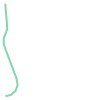

In [21]:
p1 = utils.path_2d(vm.tuples_to_path(s1))
p1

In [22]:
path=vm.tuples_to_path([(0.0, 0.0, 0.0),(0.0, 1.5, 1.5)])
roadmap.add_edge((0.0, 0.0, 0.0), (0.0, 1.5, 1.5), path=path, cost=len(path))
s2 = nx.shortest_path(roadmap, (0.0, 0.0, 0.0), (0.0, 1.5, 1.5), weight="cost")
s2

[(0.0, 0.0, 0.0), (0.0, 1.5, 1.5)]

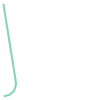

In [26]:
p2 = utils.path_2d(vm.tuples_to_path(s2))
p2

In [23]:
# plotting
import matplotlib.pyplot as plt
import shapely.ops as so
#from matplotlib.patches import Polygon
from descartes import PolygonPatch

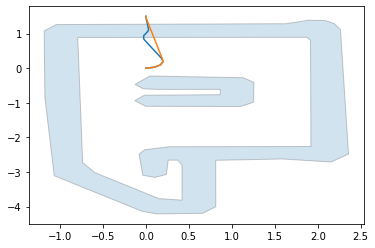

In [27]:
plt.figure()
for poly in so.cascaded_union(occ):
    ax = plt.gca()
    ax.add_patch(PolygonPatch(poly.buffer(0), alpha=0.2))
for path in [p1, p2]:
    plt.plot(*path.xy)
    
plt.show()

In [28]:
p1.intersects(occ)

True

In [29]:
p2.intersects(occ)

True